# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

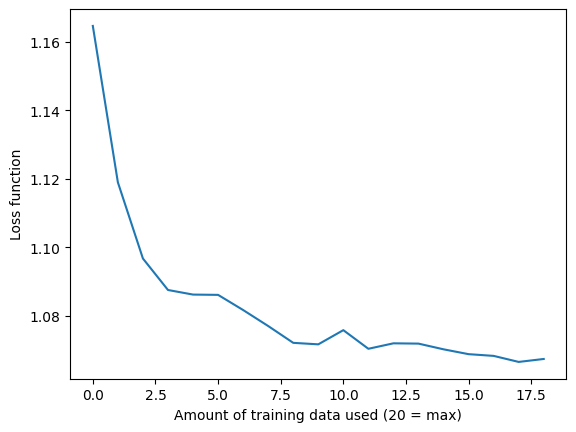

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

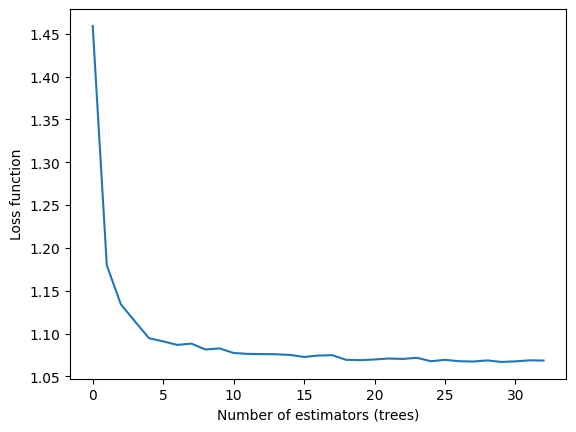

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

ANSWER 

I would keep the "amount of training data used" graph and remove the "number of estimators" graph. The "number of estimators" graph plateaus very early after about 5-10 estimators and is overall less visually impactful because the change in loss function becomes marginal. The "amount of training data used" does not plateau after a certain amount but shows a steady decrease in loss function as more training data is used. Overall it seems like "amount of training data used" will have a more dramatic effect on loss function as x increases, while "number of estimators" does not greatly affect loss function after 5 to 10 estimators. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [3]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_pima = pd.read_csv("pima_indian_diabetes_dataset.csv") 
#replaced #2 from milestone 3: df_heart = pd.read_csv("heart_disease.csv")

#3
df_cc = pd.read_csv("colorectal_cancer_dataset.csv")

DATASET 1: Diabetes Health Indicators

In [9]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [33]:
# rf classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define classifier
rf_clf = RandomForestClassifier(random_state=42)

# 3. Hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

# 4. RandomizedSearchCV
search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit and report best params
search.fit(X_train, y_train)

print("✅ Best Parameters Found:", search.best_params_)
print(f"📈 Best Cross-Validated Accuracy: {search.best_score_:.4f}")

# 6. Evaluate on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Final Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 10}
📈 Best Cross-Validated Accuracy: 0.8487

📊 Final Test Performance:
Accuracy: 0.8511116367076632

Confusion Matrix:
 [[42033     0   762]
 [  859     0    85]
 [ 5848     0  1149]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.58      0.16      0.26      6997

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.39     50736
weighted avg       0.81      0.85      0.81     50736



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# rf with 10 n_iters, takes longer 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare data
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8, 1.0]
}

# Randomized Search CV
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

# Output: best params and MAE from training
print("✅ Best Parameters Found:", search.best_params_)
print(f"📉 Best Cross-Validated MAE: {abs(search.best_score_):.4f}")

# Save best model
best_model = search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 1.0, 'max_depth': 10}
📉 Best Cross-Validated MAE: 0.4016


In [24]:
# Evaluate Model on Test Set (dataset 1) - n_iters = 10

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Final Evaluation on Test Set:")
print(f"🔍 R² Score: {r2:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")

📊 Final Evaluation on Test Set:
🔍 R² Score: 0.2021
📏 Mean Absolute Error (MAE): 0.3991


DATASET 2: Pima Indians Diabetes Dataset

In [32]:
#random forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare data
X = df_pima.drop(columns=['Outcome'])
y = df_pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define classifier
rf_clf = RandomForestClassifier(random_state=42)

# 3. Hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

# 4. RandomizedSearchCV
search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit and report best params
search.fit(X_train, y_train)

print("✅ Best Parameters Found:", search.best_params_)
print(f"📈 Best Cross-Validated Accuracy: {search.best_score_:.4f}")

# 6. Evaluate on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Final Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
📈 Best Cross-Validated Accuracy: 0.7801

📊 Final Test Performance:
Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare data
X = df_pima.drop(columns=['Outcome'])
y = df_pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8, 1.0]
}

# Randomized Search CV
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

# Output: best params and MAE from training
print("✅ Best Parameters Found:", search.best_params_)
print(f"📉 Best Cross-Validated MAE: {abs(search.best_score_):.4f}")

# Save best model
best_model = search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 10}
📉 Best Cross-Validated MAE: 0.3028


In [ ]:
# Evaluate Model on Test Set (dataset 2)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Final Evaluation on Test Set:")
print(f"🔍 R² Score: {r2:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")

📊 Final Evaluation on Test Set:
🔍 R² Score: 0.2880
📏 Mean Absolute Error (MAE): 0.3124


DATASET 3: Colorectal Cancer Global Dataset

In [26]:
df_cc.dtypes

Patient_ID                     int64
Country                       object
Age                            int64
Gender                        object
Cancer_Stage                  object
Tumor_Size_mm                  int64
Family_History                object
Smoking_History               object
Alcohol_Consumption           object
Obesity_BMI                   object
Diet_Risk                     object
Physical_Activity             object
Diabetes                      object
Inflammatory_Bowel_Disease    object
Genetic_Mutation              object
Screening_History             object
Early_Detection               object
Treatment_Type                object
Survival_5_years              object
Mortality                     object
Healthcare_Costs               int64
Incidence_Rate_per_100K        int64
Mortality_Rate_per_100K        int64
Urban_or_Rural                object
Economic_Classification       object
Healthcare_Access             object
Insurance_Status              object
S

In [5]:
# selecting just the columns related to diabetes risk and encoding the categorical columns 

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define columns of interest
categorical_cols = [
    'Alcohol_Consumption',
    'Obesity_BMI',
    'Physical_Activity',
    'Economic_Classification',
    'Healthcare_Access',
    'Diabetes'
]

numeric_cols = [
    'Age',
    'Healthcare_Costs',
    'Mortality_Rate_per_100K'
]

# Subset the DataFrame
df_cc_subset = df_cc[categorical_cols + numeric_cols].copy()

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df_cc_subset[col] = le.fit_transform(df_cc_subset[col].astype(str))

# Show the cleaned DataFrame
print(df_cc_subset.head())

   Alcohol_Consumption  Obesity_BMI  Physical_Activity  \
0                    1            2                  1   
1                    0            2                  1   
2                    0            0                  1   
3                    0            1                  1   
4                    0            0                  2   

   Economic_Classification  Healthcare_Access  Diabetes  Age  \
0                        0                  2         0   77   
1                        1                  0         0   59   
2                        0                  2         0   66   
3                        0                  2         0   83   
4                        1                  0         0   66   

   Healthcare_Costs  Mortality_Rate_per_100K  
0             54413                        5  
1             76553                       25  
2             62805                       27  
3             89393                       11  
4             66425            

In [34]:
# rf classification - dataset 3

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare data
X = df_cc_subset.drop(columns=['Diabetes'])
y = df_cc_subset['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define classifier
rf_clf = RandomForestClassifier(random_state=42)

# 3. Hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', 0.5, 0.8]
}

# 4. RandomizedSearchCV
search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit and report best params
search.fit(X_train, y_train)

print("✅ Best Parameters Found:", search.best_params_)
print(f"📈 Best Cross-Validated Accuracy: {search.best_score_:.4f}")

# 6. Evaluate on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Final Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
📈 Best Cross-Validated Accuracy: 0.7994

📊 Final Test Performance:
Accuracy: 0.8007164179104478

Confusion Matrix:
 [[26824     0]
 [ 6676     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     26824
           1       0.00      0.00      0.00      6676

    accuracy                           0.80     33500
   macro avg       0.40      0.50      0.44     33500
weighted avg       0.64      0.80      0.71     33500



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# rf classification - dataset 3 - class balanced

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare data
X = df_cc_subset.drop(columns=['Diabetes'])
y = df_cc_subset['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Define classifier *with class weights*
rf_clf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'     # <-- here!
)

# 3. Hyperparameter search space
param_dist = {
    'n_estimators':      [50, 100, 150],
    'max_depth':         [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf':  [1, 2],
    'max_features':      ['sqrt', 'log2', 0.5, 0.8]
    # optionally: 'class_weight': ['balanced', 'balanced_subsample', None]
}

# 4. RandomizedSearchCV
search = RandomizedSearchCV(
    rf_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 5. Fit and report best params
search.fit(X_train, y_train)
print("✅ Best Parameters Found:", search.best_params_)
print(f"📈 Best Cross-Validated Accuracy: {search.best_score_:.4f}")

# 6. Evaluate on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n📊 Final Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
✅ Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
📈 Best Cross-Validated Accuracy: 0.7873

📊 Final Test Performance:
Accuracy: 0.7867761194029851

Confusion Matrix:
 [[26196   628]
 [ 6515   161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88     26824
           1       0.20      0.02      0.04      6676

    accuracy                           0.79     33500
   macro avg       0.50      0.50      0.46     33500
weighted avg       0.68      0.79      0.71     33500



In [ ]:
# rf with 10 n_iters - regression 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Prepare data
X = df_cc_subset.drop(columns=['Diabetes'])
y = df_cc_subset['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8, 1.0]
}

# Randomized Search CV
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

# Output: best params and MAE from training
print("✅ Best Parameters Found:", search.best_params_)
print(f"📉 Best Cross-Validated MAE: {abs(search.best_score_):.4f}")

# Save best model
best_model = search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


✅ Best Parameters Found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
📉 Best Cross-Validated MAE: 0.3208


In [ ]:
# Evaluate Model on Test Set (dataset 2) - regression

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"📊 Final Evaluation on Test Set:")
print(f"🔍 R² Score: {r2:.4f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")

📊 Final Evaluation on Test Set:
🔍 R² Score: -0.0001
📏 Mean Absolute Error (MAE): 0.3199


At first I ran randomforestregression, but then realized my target is a classification problem so I reran with randomforestclassifier. If I had a more advanced computer or software (I only have a macbook air, using github codespaces), I would run grid search to run through all possible parameter combinations. Unfortunately that would take days on my current computer.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

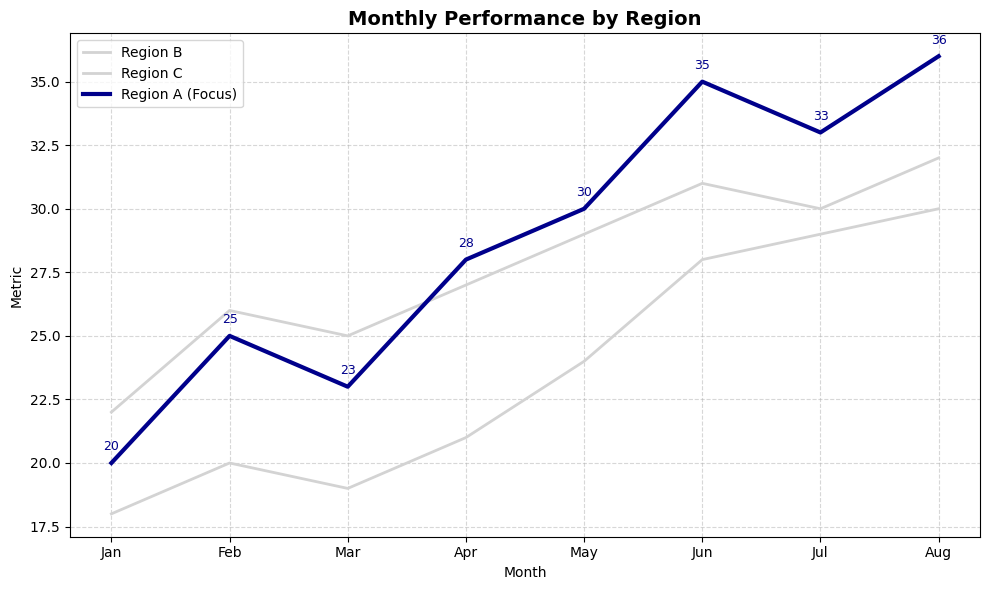

In [5]:
import matplotlib.pyplot as plt

# Mock data: monthly values for 3 regions
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
region_a = [20, 25, 23, 28, 30, 35, 33, 36]
region_b = [22, 26, 25, 27, 29, 31, 30, 32]
region_c = [18, 20, 19, 21, 24, 28, 29, 30]

plt.figure(figsize=(10, 6))

# Plot muted lines
plt.plot(months, region_b, color='lightgray', linewidth=2, label='Region B')
plt.plot(months, region_c, color='lightgray', linewidth=2, label='Region C')

# Highlighted line (Region A)
plt.plot(months, region_a, color='darkblue', linewidth=3, label='Region A (Focus)')

# Add value labels to highlighted line
for i, value in enumerate(region_a):
    plt.text(months[i], value + 0.5, str(value), ha='center', fontsize=9, color='darkblue')

# Styling
plt.title('Monthly Performance by Region', fontsize=14, weight='bold')
plt.ylabel('Metric')
plt.xlabel('Month')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
